##Problem Statement: Mini Project 1- Stock Market Analysis Using Python
Business Scenario: Data Science extracts meaningful insight from chunks of raw data, which is
useful to different business segments for planning their future course of action. Finance is
probably one of the first to catch on to this trend with a rise in the penetration of analytics into
many aspects of our lives. Here, we will analyze data from the stock market for some technology
stocks such as Apple, Google, Amazon, and Microsoft.
Objective: Use Python libraries such as Pandas, Seaborn, and Matplotlib to extract and analyze
the information, visualize it, and look at different ways to analyze the risk of a stock, based on its
performance history.
About the Data: The stocks we have chosen are from various industries and market caps namely,
• Apple
• Google
• Microsoft
• Amazon
For the start, we shall investigate the Amazon stock individually and then move on to the
combined analysis.
To know more about stocks and their data please visit the below link:
https://in.finance.yahoo.com/
The following tasks are to be performed:
• Read the Data from Yahoo finance website directly.
• Perform cleaning.
• What was the change in stock price over time?
• Visualize the change in a stock’s volume being traded, over time?
• What was the moving average of various stocks?
• What was the daily return average of a stock?
• Add a new column ‘Trend’ whose values are based on the 'Daily Return'.
• Visualize trend frequency through a Pie Chart.
• What was the correlation between the daily returns of different stocks?

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Amazon change in stock price over time:
1      0.025593
2      0.001920
3     -0.017801
4     -0.019865
5      0.003451
         ...   
246   -0.012532
247    0.029680
248   -0.018984
249    0.000101
250   -0.005876
Name: Close, Length: 250, dtype: float64




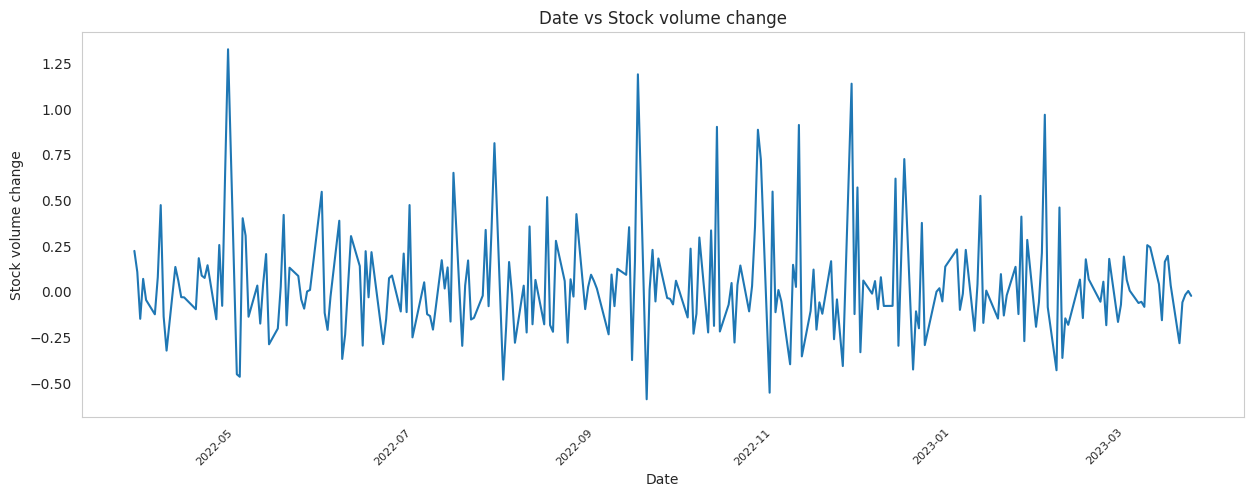



Stock market moving average from amazon_Hist_file is :
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
246    96.7814
247    97.0720
248    97.2988
249    97.4756
250    97.5364
Name: moving_average, Length: 251, dtype: float64


Stock market moving average from microsoft_Hist_file is :
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
246    252.303801
247    253.280801
248    254.184201
249    255.160401
250    256.056401
Name: moving_average, Length: 251, dtype: float64


Stock market moving average from googl_Hist_file is :
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
246    95.1176
247    95.4692
248    95.7762
249    96.1198
250    96.3982
Name: moving_average, Length: 251, dtype: float64


Stock market moving average from apple_Hist_file is :
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ... 

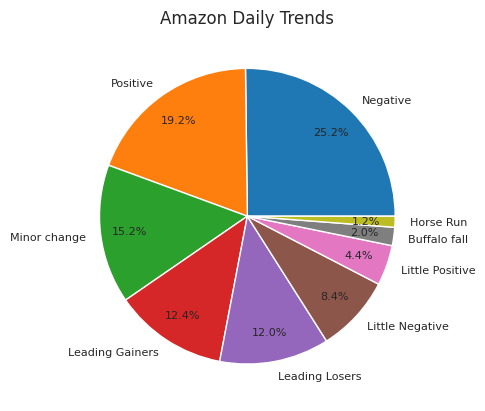

Correlation matrix between the daily returns of the four stocks:
                 Trend_Amazon  Trend_Microsoft  Trend_Google  Trend_Apple
Trend_Amazon         1.000000         0.758035      0.757865     0.705046
Trend_Microsoft      0.758035         1.000000      0.821314     0.792660
Trend_Google         0.757865         0.821314      1.000000     0.772705
Trend_Apple          0.705046         0.792660      0.772705     1.000000


In [ ]:
from pandas.io.common import file_exists
# Install libraries and import libraries

import pandas as pd
import requests
from io import StringIO
!pip install matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import os
import warnings

# Ignore all the deprecated warnings in the code
warnings.filterwarnings('ignore', category = FutureWarning)

print('\n')

# Assign the stock markets urls and local file names
def main_define_execute():
  # url link to get the Amazon stock historical data
  url_stock_company = 'https://www.dropbox.com/s/y2enrh0o8baaa20/Amazon%20Stock%20%20_%20%20Historical%20Price.csv?dl=1'
  file_access_dir_amzn = '/amazon_Hist_file' # Amazon Historical local file name to create
  # call function to get the Amazon stock historical data and Save it to a local file
  get_url_response(url_stock_company, file_access_dir_amzn)
  clean_data(file_access_dir_amzn) # Clean the Amazon historical data and update/save

  # define url link to get the Microsoft stock historical data
  url_stock_company = 'https://www.dropbox.com/s/hxv9kr6o99zj3ys/Microsoft%20Stock%20%20_%20%20Historical%20Price.csv?dl=1'
  file_access_dir_micr ='/microsoft_Hist_file' # define Microsoft Historical local file name to create

  # call function to get the Microsoft stock historical data and Save it to a local file
  get_url_response(url_stock_company,file_access_dir_micr)
  clean_data(file_access_dir_micr) # call function to clean the Microsoft historical data and update/save

  # define url link to get the Google stock historical data
  url_stock_company = 'https://www.dropbox.com/s/n7140tvoheffcso/Googl%20Stock%20%20_%20%20Historical%20Price.csv?dl=1'
  file_access_dir_googl = '/googl_Hist_file' # define Google Historical local file name to create

  # call function to get the Google stock historical data and Save it to a local file
  get_url_response(url_stock_company, file_access_dir_googl)
  clean_data(file_access_dir_googl) # Call function to clean the Google historical data and update/save

  # Define url link to get the Apple stock historical data
  url_stock_company = 'https://www.dropbox.com/s/jjolhvwa1v9ac6o/Apple%20Stock%20%20_%20%20Historical%20Price.csv?dl=1'
  file_access_dir_appl ='/apple_Hist_file' # Define Apple Historical local file name to create

  # call function to get the Apple stock historical data and Save it to a local file
  get_url_response(url_stock_company, file_access_dir_appl)
  clean_data(file_access_dir_appl)# Call function to clean the Apple historical data and update/save


  change_stock_over_time(file_access_dir_amzn)

  # Call function to visualise Amazon stock volume
  change_stock_vol(file_access_dir_amzn)

  # Call functions to get moving average of various stocks
  moving_average_stocks(file_access_dir_amzn) # call for Amazon moving average
  moving_average_stocks(file_access_dir_micr) # call for Mictosoft moving average
  moving_average_stocks(file_access_dir_googl) # call for Google moving average
  moving_average_stocks(file_access_dir_appl) # call for Apple moving average
  # df = pd.read_csv(file_access_dir_amzn)

  # Call function to get daily return average of Amazon stock
  amzn_dd_return_avg = daily_return_average(file_access_dir_amzn)
  # Call function to add daily return to Amazon historic data file
  daily_return_Add(file_access_dir_amzn)
  # Call function to show pie Plot for Amazon frequency daily return
  # plt_daily_return(file_access_dir_amzn)

  # Call function to add daily return to Microaoft historic data file
  daily_return_Add(file_access_dir_micr)
  # Call function to add daily return to Google historic data file
  daily_return_Add(file_access_dir_googl)
  # Call function to add daily return to Apple historic data file
  daily_return_Add(file_access_dir_appl)

  # pass the amazon Historical data file
  map_trend_category(file_access_dir_amzn)

  # pass the amazon Historical data file
  plt_daily_return(file_access_dir_amzn)

  # Call function to get the correlation between the daily returns of different stocks
  corr_stocks_daily_returns(file_access_dir_amzn,file_access_dir_micr,file_access_dir_googl,file_access_dir_appl)

# save content of the historal stock market data
def get_url_response(url,file_access_path):
  reponse = requests.get(url)

  csv_file = StringIO(reponse.text)

  df = pd.read_csv(csv_file)

  df.to_csv(file_access_path,index = False)


#  Cleaning the history content of the company stock market
def clean_data(file_access_path):

  df = pd.read_csv(file_access_path)

  df_isnull = df.isnull()

  df_duplicated = df['Date'].duplicated()

  if(df_isnull.bool == True):
    df.dropna()

  if(df_duplicated.bool == True):
    df.drop_duplicates(inplace = True)




# Get Amazon change in stock price over time
def change_stock_over_time(file_access_path):
  df = pd.read_csv(file_access_path)

  # Calculate the difference series of current close price from  previous close price
  stock_price_change = df['Close'].pct_change()
  # Drop all the NA values in the calculated stock price change
  stock_price_change.dropna(inplace = True)

  print('Amazon change in stock price over time:')
  print(stock_price_change);
  print('\n');


# Visualize of Amazon change in stock volume traded over time
def change_stock_vol(file_access_path):
  df = pd.read_csv(file_access_path)

  df['Stock volume change'] = df['Volume'].pct_change()
  df.dropna(inplace = True)

  df['Date'] = pd.to_datetime(df['Date'])

  # Create a new DataFrame with all dates from the first to last date in the stock_data DataFrame
  plt.figure(figsize=(15,5))

  sn.lineplot(df, x='Date', y = 'Stock volume change')

  plt.xlabel('Date')
  plt.xticks(rotation=45, ha='right', fontsize = 8)

  # Name the plot y axis label
  plt.ylabel('Stock volume change')
  # Giving or formating the style to the plot y label
  plt.ticklabel_format(style='plain', axis='y')

  plt.title('Date vs Stock volume change')
  # show the grid that will appear in the plot background
  plt.grid()
  plt.show()

  plt.close()

  df.drop(columns = ['Stock volume change'], inplace = True)
  print('\n');

# Get moving average for various stocks
def moving_average_stocks(file_access_path):
  df = pd.read_csv(file_access_path)
  # Get the moving average of stocks
  df['moving_average'] = pd.Series(df['Close']).rolling(window = 50).mean()

  # Get stock historical file directory to get the stock name
  file_ext_name = os.path.basename(file_access_path)
  file_name = os.path.splitext(file_ext_name)[0]


  print(f"Stock market moving average from {file_name} is :")
  print(df['moving_average'])
  print('\n');

# Get daily return average of Amazon stock
def daily_return_average(file_access_path):
  df = pd.read_csv(file_access_path)

  # Galculate daily return average of
  dd_return_avg = df['Close'].pct_change().mean()
  print('Amazon stock daily return average:');
  print(dd_return_avg);
  print('\n');

# Add the Trend column to stock history data
def daily_return_Add(file_access_path):
  # Add Trend column with daily return values on the Amazon data frame
  df = pd.read_csv(file_access_path)

  df['Trend'] = df['Close'].pct_change()

  # Remove all the data frame rows containing 'nan' value
  df.dropna(inplace = True)

  # Save data frame that has been updated or has no nan rows
  df.to_csv(file_access_path)

# Add a column that categorise the Daily return values on the company data frame
def map_trend_category(file_access_path):
  df = pd.read_csv(file_access_path)

  df['Daily Trend'] = df['Trend']

  # Add a column that categorise the daily returns of a company stock
  df['Daily Trend'] = df['Trend'].apply(lambda val:trend_category_select(val))

  df.to_csv(file_access_path)


# Categorise the company stock market daily returns
def trend_category_select(trend_value):
  if trend_value > -0.005 and trend_value <= 0.005:
    return 'Minor change'
  elif trend_value > 0.005 and trend_value <= 0.01:
    return 'Little Positive'
  elif trend_value > -0.01 and trend_value <= -0.005:
    return 'Little Negative'
  elif trend_value > 0.01 and trend_value <= 0.03:
    return 'Positive'
  elif trend_value > -0.03 and trend_value <= -0.01:
    return 'Negative'
  elif trend_value > 0.03 and trend_value <= 0.07:
    return 'Leading Gainers'
  elif trend_value > -0.07 and trend_value <= -0.03:
    return 'Leading Losers'
  elif trend_value > 0.07:
    return 'Horse Run'
  elif trend_value <= -0.07:
    return 'Buffalo fall'


# Show company daily returnsfrequency pie Plot
def plt_daily_return(file_access_amzn_path):
  df = pd.read_csv(file_access_amzn_path)

  # Define the labels for the different trend categories
  trend_labels = {'Minor change': 'Minor change',
                'Little Positive': 'Little Positive',
                'Little Negative': 'Little Negative',
                'Positive': 'Positive',
                'Negative': 'Negative',
                'Leading Gainers': 'Leading Gainers',
                'Leading Losers': 'Leading Losers',
                'Horse Run': 'Horse Run',
                'Buffalo fall': 'Buffalo fall'}


  # Calculate the frequency of each trend category
  trend_counts = df['Daily Trend'].value_counts()

  # Create a list of labels for the pie chart by mapping the trend categories to their labels
  pie_labels = [trend_labels.get(key) for key in trend_counts.index]

  # Create the pie chart with labeled wedges
  plt.title('Amazon Daily Trends', y=1)

  plt.pie(trend_counts, labels = pie_labels, autopct = '%1.1f%%', radius = 1, textprops={'fontsize': '8'}, pctdistance=0.8)
  # Set the white background for the plot
  sn.set_style("whitegrid")

  # Show the pie chart with all the Amazon stock daily return
  plt.show()

  # closing the plot opened
  plt.close()


# Get correlation between the daily returns of different stocks
def corr_stocks_daily_returns(file_access_amzn_path,file_access_micr_path,file_access_googl_path,file_access_appl_path):
  # Read stock's files
  amzn_df = pd.read_csv(file_access_amzn_path)
  micr_df = pd.read_csv(file_access_micr_path)
  googl_df = pd.read_csv(file_access_googl_path)
  appl_df = pd.read_csv(file_access_appl_path)


  # Create a data frame of the daily returns colums between stocks
  df_merge_returns = pd.merge(amzn_df[['Date', 'Trend']], micr_df[['Date', 'Trend']], on='Date')
  df_merge_returns = pd.merge(df_merge_returns, googl_df[['Date', 'Trend']], on='Date')
  df_merge_returns = pd.merge(df_merge_returns, appl_df[['Date', 'Trend']], on='Date')
  df_merge_returns.columns = ['Date', 'Trend_Amazon', 'Trend_Microsoft', 'Trend_Google', 'Trend_Apple']

  df_merge_returns.drop(columns= 'Date', axis = 1, inplace= True)
  # Get the correlation between stocks daily return
  stock_daily_returns_corr = np.corrcoef(df_merge_returns.iloc[:,0:], rowvar= False)
  corr_df =  pd.DataFrame(stock_daily_returns_corr, columns = df_merge_returns.columns, index = df_merge_returns.columns)


  # Print the correlation between stocks daily return
  print("Correlation matrix between the daily returns of the four stocks:")
  print(corr_df)

# call main function that will be the start of all the tasks to peform
main_define_execute()






In [ ]:
from google.colab import drive
drive.mount('/content/drive')